In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [9]:
env = BlackjackEnv()
env.reset()

(21, 4, True)

In [24]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    #watabe:see "https://teratail.com/questions/150160"
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    def print_observation(observation):
        score, dealer_score, usable_ace = observation
        print(f"Player Score: {score} (Usable Ace: {usable_ace}), Dealer Score: {dealer_score}")

    #def strategy(observation):
    #    score, dealer_score, usable_ace = observation
    #    # Stick (action 0) if the score is > 20, hit (action 1) otherwise
    #    return 0 if score >= 20 else 1

    for i_episode in range(1, num_episodes + 1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        #episode = []

        observation = env.reset()
        for t in range(1000):
            action = policy(observation)
            
            observation, reward, done, _ = env.step(action)
            #episode.append((observation, action, reward))
            
            if done:
                returns_count[observation] += 1;
                returns_sum[observation] += (reward - returns_sum[observation])/returns_count[observation]
                #print_observation(observation)
                #print(f"Game end. Reward: {float(reward)}\n")
                break
            else:
                returns_count[observation] += 1;
                returns_sum[observation] += (reward - returns_sum[observation])/returns_count[observation] 
    V = returns_sum
    return V    

In [27]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 10000/10000.

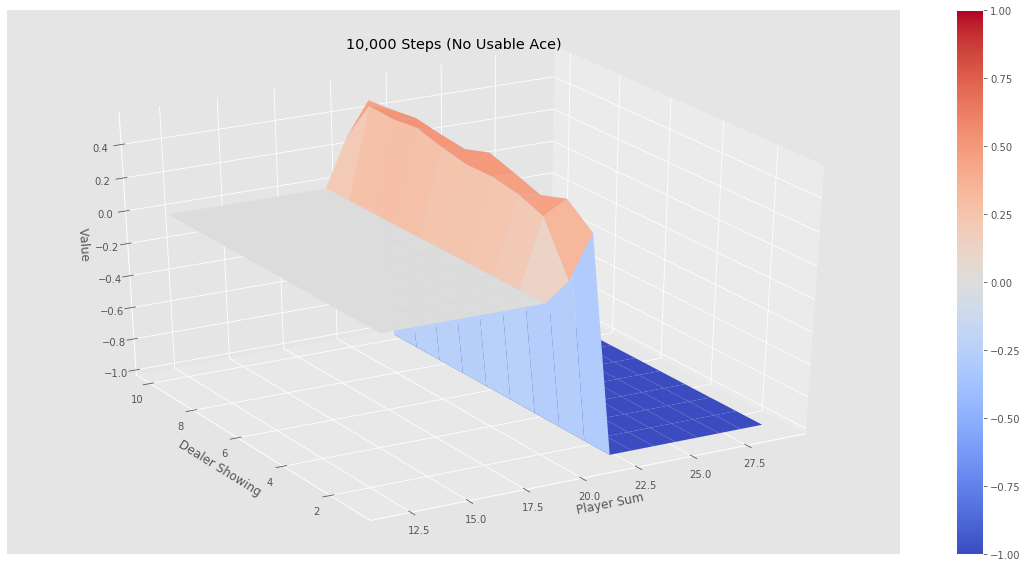

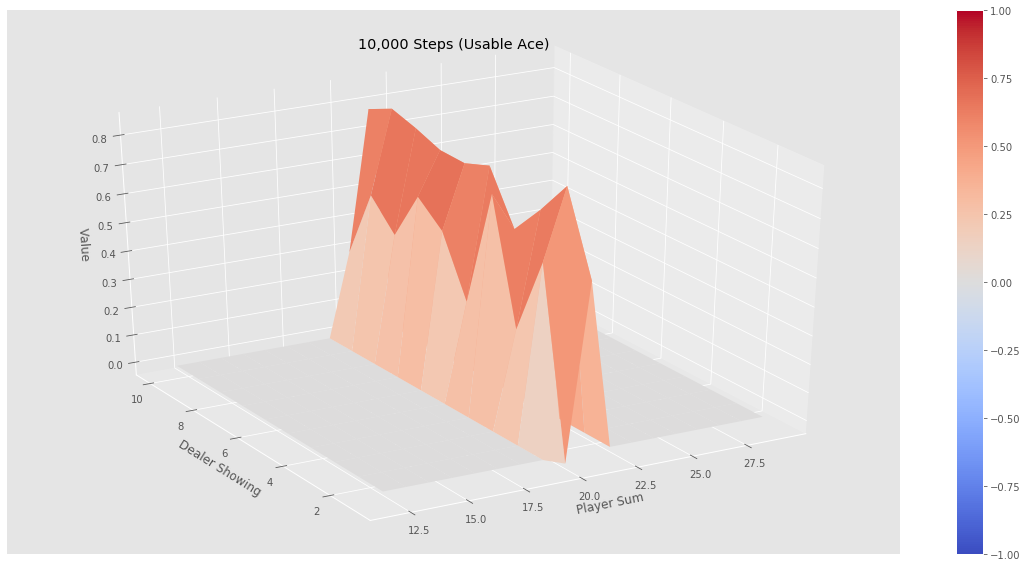

Episode 500000/500000.

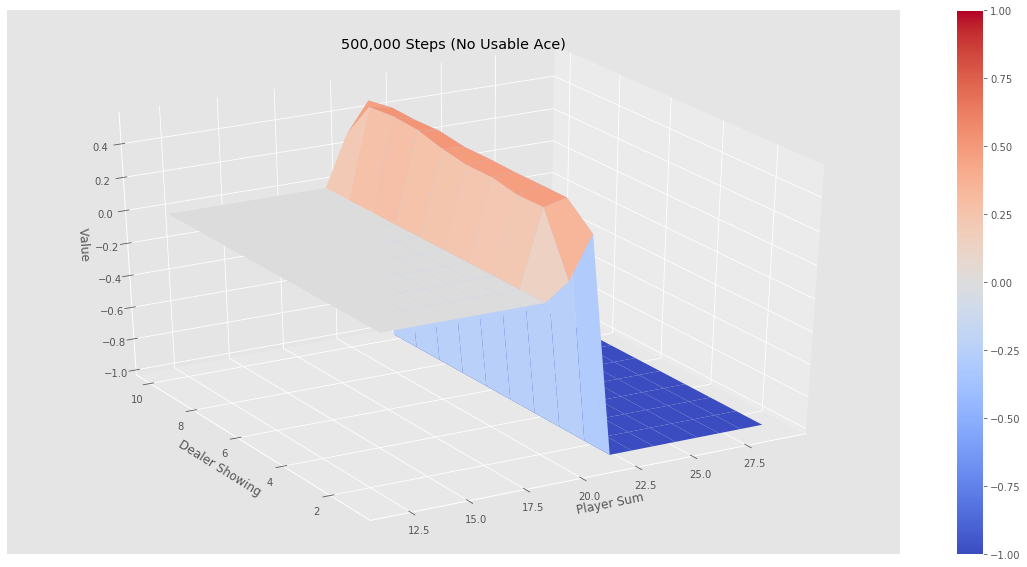

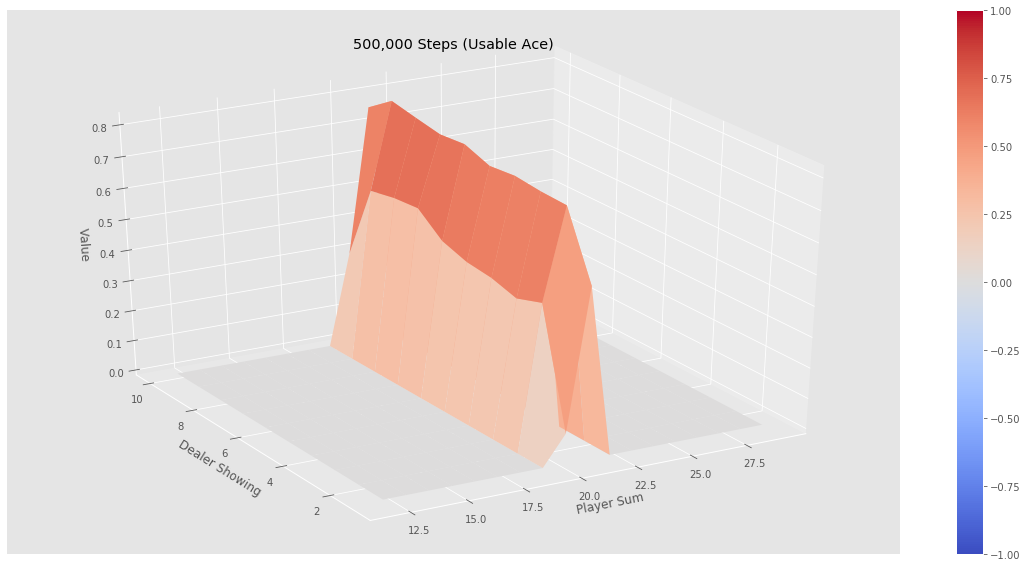

In [29]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")